In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('insurance.csv')

In [3]:
# a. Shape of the data
df.shape

(1338, 7)

In [4]:
# b. Data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# c. Checking the presence of missing values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
# d. 5 point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


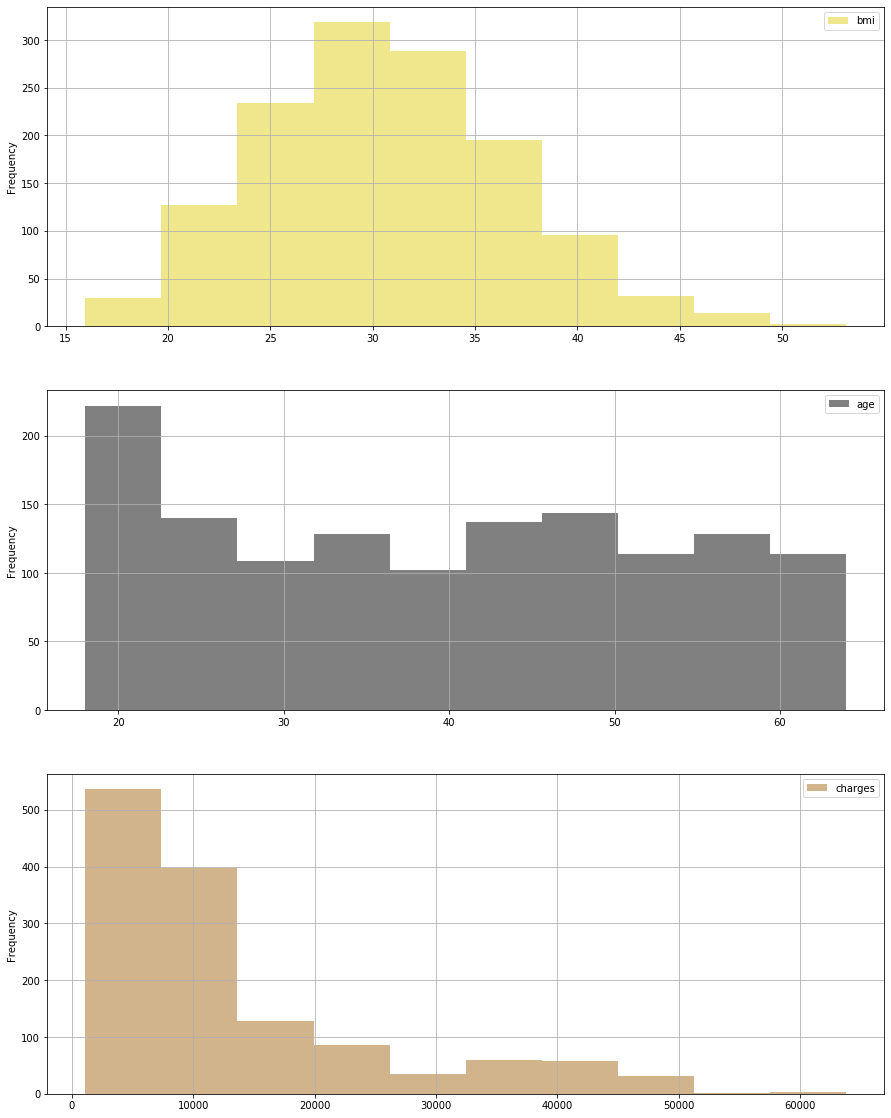

In [7]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
plt.figure(figsize = (15, 20))
plt.subplot(3,1,1)
df['bmi'].plot(kind = 'hist', label = 'bmi', color = 'khaki')
plt.grid()
plt.legend()

plt.subplot(3,1,2)
df['age'].plot(kind = 'hist', label = 'age', color = 'gray')
plt.grid()
plt.legend()

plt.subplot(3,1,3)
df['charges'].plot(kind = 'hist', label = 'charges', color = 'tan')
plt.grid()
plt.legend()

In [8]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
print("bmi's skew:",df['bmi'].skew())
print("age's skew:",df['age'].skew())
print("charges's skew:",df['charges'].skew())

bmi's skew: 0.2840471105987448
age's skew: 0.05567251565299186
charges's skew: 1.5158796580240388


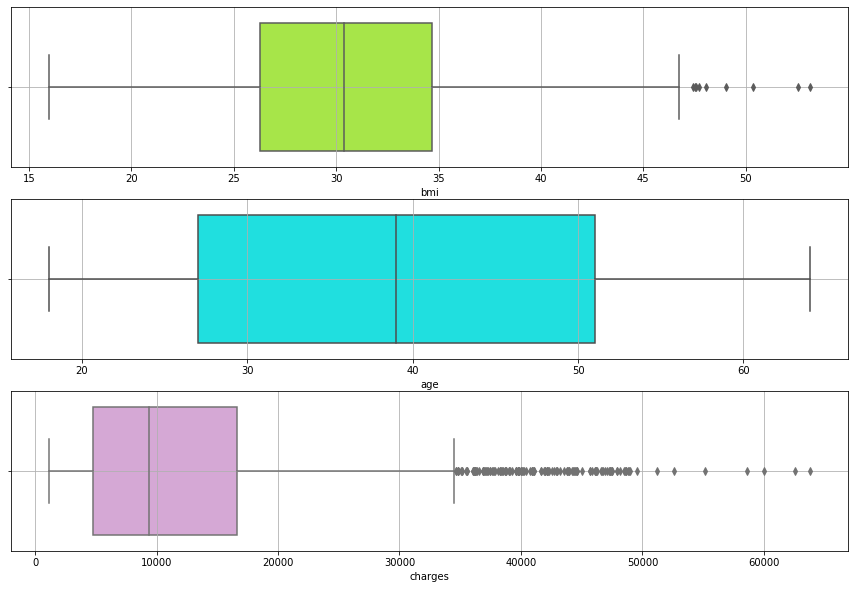

In [9]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and V‘charges columns
plt.figure(figsize = (15, 10))
plt.subplot(3,1,1)
sns.boxplot(df['bmi'], color = 'greenyellow')
plt.grid()

plt.subplot(3,1,2)
sns.boxplot(df['age'], color = 'aqua')
plt.grid()

plt.subplot(3,1,3)
sns.boxplot(df['charges'], color = 'plum')
plt.grid()

In [10]:
# Z Score 
from scipy.stats import zscore
z_bmi = zscore(df['bmi'])
z_age = zscore(df['age'])
z_charges = zscore(df['charges'])

In [11]:
# Outliers of bmi
print(df[abs(z_bmi) > 1.5])

      age     sex     bmi  children smoker     region      charges
13     56  female  39.820         0     no  southeast  11090.71780
14     27    male  42.130         0    yes  southeast  39611.75770
18     56    male  40.300         0     no  southwest  10602.38500
28     23    male  17.385         1     no  northwest   2775.19215
35     19    male  20.425         0     no  northwest   1625.43375
...   ...     ...     ...       ...    ...        ...          ...
1312   34    male  42.900         1     no  southwest   4536.25900
1316   19  female  20.600         0     no  southwest   1731.67700
1317   18    male  53.130         0     no  southeast   1163.46270
1323   42  female  40.370         2    yes  southeast  43896.37630
1332   52  female  44.700         3     no  southwest  11411.68500

[174 rows x 7 columns]


In [12]:
# Outliers of age
print(df[abs(z_age) > 1.5])

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
11     62  female  26.290         0    yes  southeast  27808.72510
22     18    male  34.100         0     no  southeast   1137.01100
26     63  female  23.085         0     no  northeast  14451.83515
31     18  female  26.315         0     no  northeast   2198.18985
...   ...     ...     ...       ...    ...        ...          ...
1322   62    male  38.830         0     no  southeast  12981.34570
1325   61    male  33.535         0     no  northeast  13143.33665
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1337   61  female  29.070         0    yes  northwest  29141.36030

[160 rows x 7 columns]


In [13]:
# Outliers of charges
print(df[abs(z_charges) > 1.5])

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[156 rows x 7 columns]


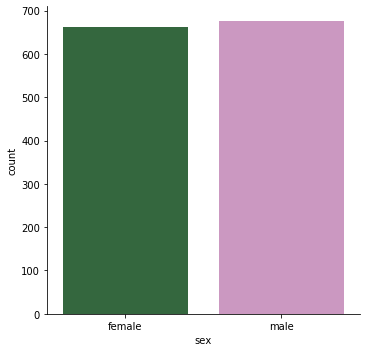

In [14]:
# h. Distribution of categorical columns
sns.catplot(x = 'sex', kind ='count', palette = 'cubehelix', data = df)

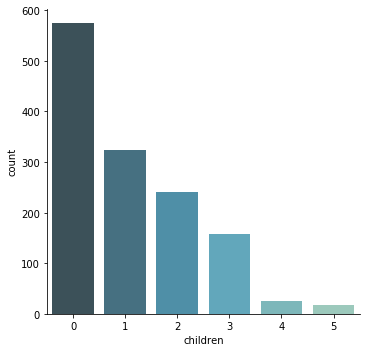

In [15]:
# h. Distribution of categorical columns
sns.catplot(x = 'children', kind ='count', palette = 'GnBu_d', data = df)

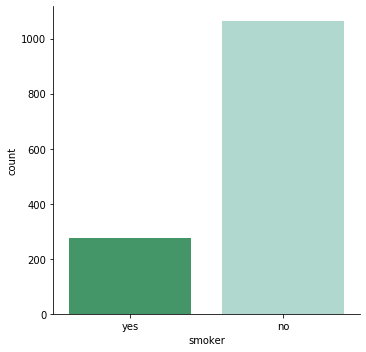

In [16]:
# h. Distribution of categorical columns
sns.catplot(x = 'smoker', kind ='count', palette = 'BuGn_r', data = df)

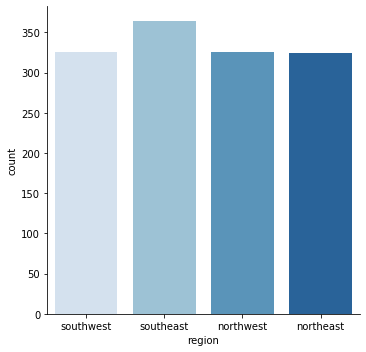

In [17]:
# h. Distribution of categorical columns
sns.catplot(x = 'region', kind ='count', palette = 'Blues', data = df)

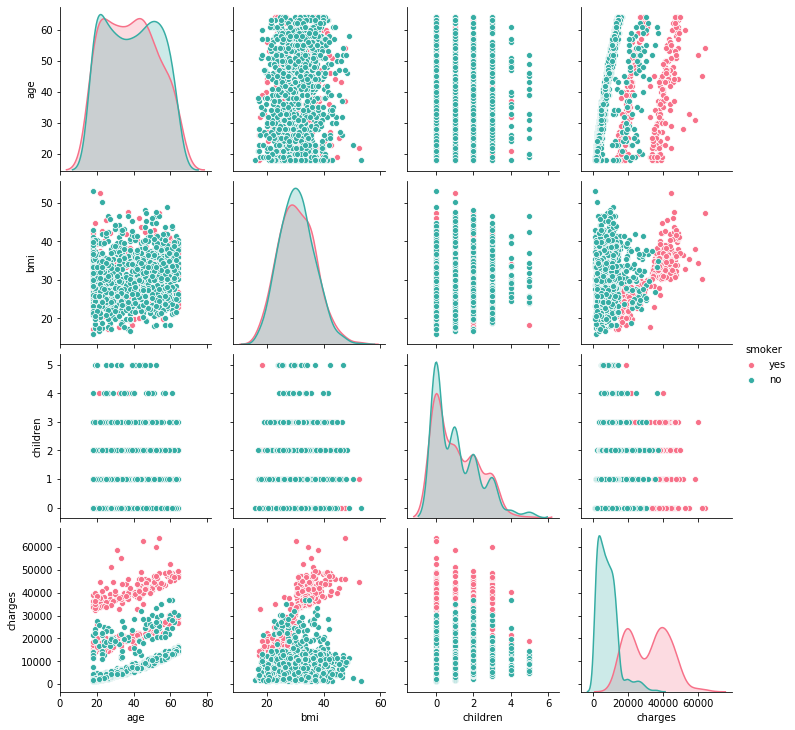

In [18]:
# i. Pair plot that includes all the columns of the dataframe
sns.pairplot(df, hue = 'smoker', palette = 'husl')

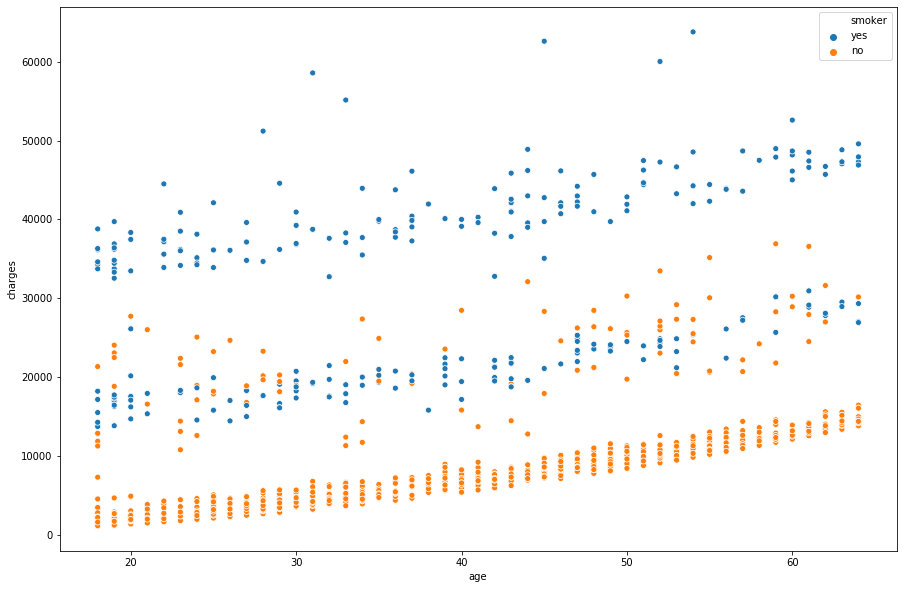

In [28]:
# a. Do charges of people who smoke differ significantly from the people who don't?
plt.figure(figsize = (15, 10))
sns.scatterplot(df['age'], df['charges'], hue = df['smoker'])

In [20]:
"""
H0 = Charges are same for smoker and non smoker
HA = Chages are not same for smoker and non smoker
"""
from scipy.stats import ttest_ind
a = np.array(df[df['smoker'] == 'yes']['charges'])
b = np.array(df[df['smoker'] == 'no']['charges'])
s_value, p_test = ttest_ind(a, b)
if p_test > 0.05:
    print('\nNull Hypothesis is true.')
else:
    print('\nAlternate Hypothesis is true.')


Alternate Hypothesis is true.


Ans - From graph and hypothesis, yes charges of poeple who smoke differ significantly from the poeople who don't smoke.

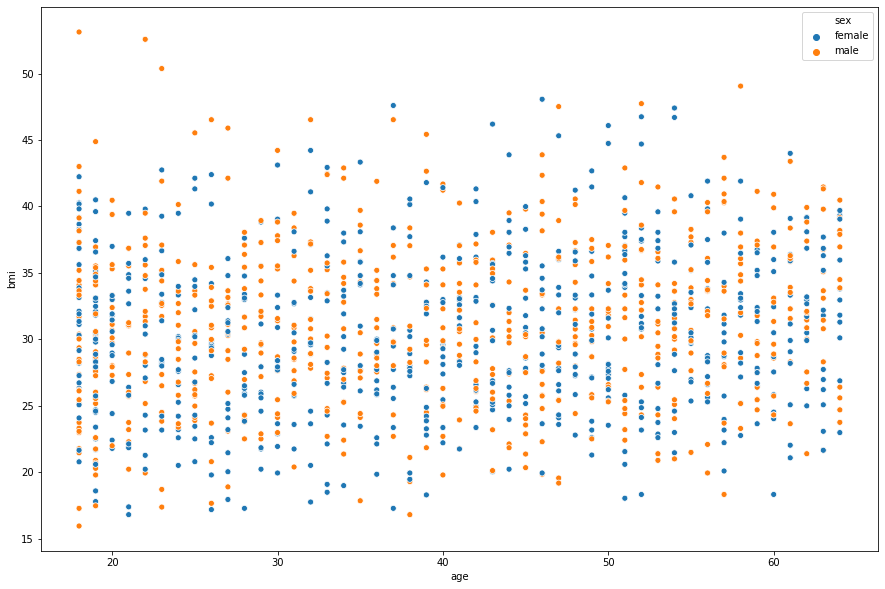

In [21]:
# b. Does bmi of males differ significantly from that of females?
plt.figure(figsize = (15, 10))
sns.scatterplot(df['age'], df['bmi'], hue = df['sex'])

In [22]:
"""
H0 = bmi is same for male and female
HA = bmi is differ for male and female
"""
a = np.array(df[df['sex'] == 'male']['bmi'])
b = np.array(df[df['sex'] == 'female']['bmi'])
s_value, p_test = ttest_ind(a, b)
if p_test > 0.05:
    print('\nNull Hypothesis is true.')
else:
    print('\nAlternate Hypothesis is true.')


Null Hypothesis is true.


Ans - From graph and hypothesis, we can tell there is no bmi for male significant differ from female.

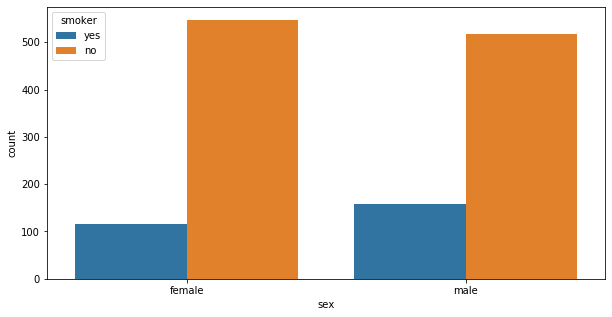

In [23]:
# c. Is the proportion of smokers significantly different in different genders?
plt.figure(figsize = (10, 5))
sns.countplot(x = 'sex', hue = 'smoker', data = df)

In [24]:
"""
H0 = proportion of smokers significantly no different in different genders.
HA = proportion of smokers significantly different in different genders.
"""
crosstab = pd.crosstab(df['sex'], df['smoker'])
from scipy.stats import chisquare
s_value, p_test = chisquare(crosstab['yes'])
if p_test > 0.05:
    print('\nNull Hypothesis is true.')
else:
    print('\nAlternate Hypothesis is true.')


Alternate Hypothesis is true.


Ans - From graph and hypothesis, proporation of smokers significantly differennt in different gender.

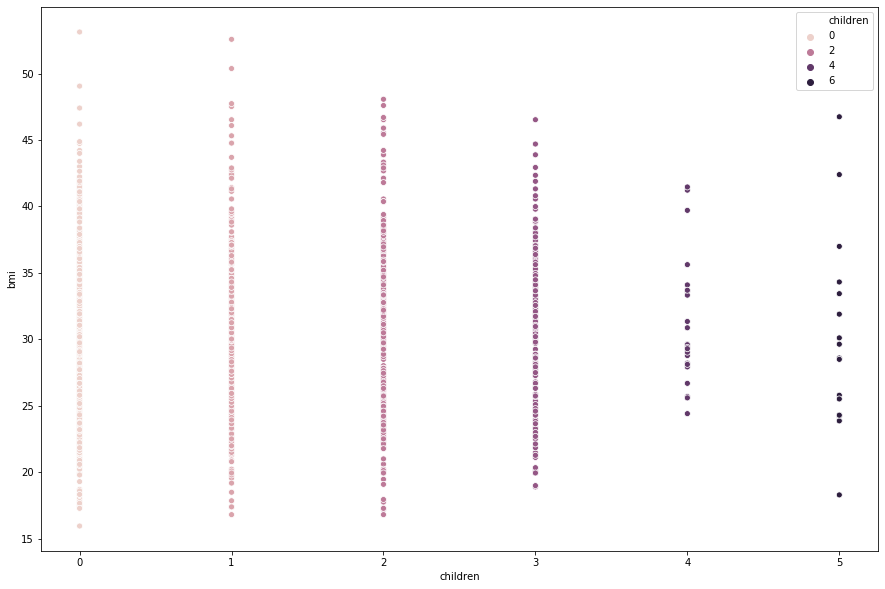

In [25]:
# d. Is the distribution of bmi across women with no children, one child and two children, the same ?
plt.figure(figsize = (15, 10))
sns.scatterplot(df['children'], df['bmi'], hue = df['children'])

In [26]:
"""
H0 = Distribution of bmi across women with no children, one child and two children are same
Ha = Distribution of bmi across women with no children, one child and two children are not same
"""
no_children = df[(df['sex'] == 'female') & (df['children'] == 0)]['bmi']
one_children = df[(df['sex'] == 'female') & (df['children'] == 1)]['bmi']
two_children = df[(df['sex'] == 'female') & (df['children'] == 2)]['bmi']
print(no_children.var(), one_children.var(), two_children.var())
print("\nAll variances are mostly nearest so test eqaulity is satisfied for ANOVA Test.")
from scipy.stats import levene
s_value, p_test = levene(no_children, one_children, two_children)
if p_test > 0.05:
    print('\nNull Hypothesis is true.')
else:
    print('\nAlternate Hypothesis is true.')

35.60430409758265 33.48741358945416 43.93303448938898

All variances are mostly nearest so test eqaulity is satisfied for ANOVA Test.

Null Hypothesis is true.


Ans - From graph and hypothesis, Distribution of bmi across women with no children, one child and two children are same.